# Analysis of Multithreaded Algorithms
### Case study project for DAA course - 5th semester B.Tech
Source: *Introduction to Algorithms (3rd Edition) by Cormen, Leiserson, Rivest and Stein*

In [4]:
# Boilerplate code

import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Process, Value
import time

# Helper class for concurrency keywords
class ProcessWithReturnValue(Process):
    def __init__(self, group=None, target=None, name=None, args=(), kwargs={}, Verbose=None):
        Process.__init__(self, group, target, name, args, kwargs)
        self._return = Value('i',0)
    def run(self):
        if self._target is not None:
            self._return.value = self._target(*self._args, **self._kwargs)
    def join(self, *args):
        Process.join(self, *args)
        return self._return.value

# Helper function to record time taken for function for N in interval [low,high]
def get_values(low,high,f):
    X=[]
    Y=[]
    for i in range(low,high):
        ti = time.time()
        f(i)
        tf = time.time()
        diff = tf-ti
        Y.append(diff)
        X.append(i)
    res = np.vstack((X,Y))
    return res

In [21]:
# Parallelism keywords
import concurrent.futures
# spawn
def spawn(f,*fargs):
    #proc = ProcessWithReturnValue(target=f,args=fargs)
    #proc.start()
    with concurrent.futures.ProcessPoolExecutor() as executor:
        fut = executor.submit(f,*fargs)
    return fut

# sync
def sync(fut):
    #x =  proc.join()
    x = fut.result()
    print(x)
    return x

#parallel for loop
def parallel_for_loop(low,high,f):
    return

In [77]:
# No. of processors
! nproc 

4


Thus, $P=4$
${\implies} \frac{T_i}{T_{\infty}}=\frac{1}{4} $


## 1. Fibonacci (naive recursive)
Work: $O({\phi}^n)$ 
Span: $O(n)$

In [5]:
def fibonacci(n):
    if n==0: return 0
    if n==1: return 1
    return fibonacci(n-1)+fibonacci(n-2)

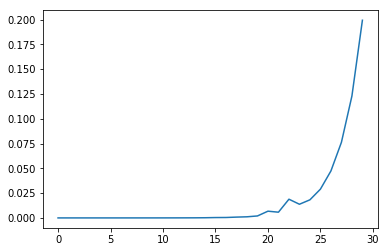

In [6]:
# code for graph
if
values = get_values(0,30,fibonacci)
plt.plot(values[0],values[1])

As seen from above graph, naive recursive fibonacci has a very high exponential complexity. There are many ways to reduce Fibonacci's complexity but our aim here is to illustrate how parallelizing a recursive algorithm affects time. Let us look at the parallel version of fibonacci now.

### Parallel version

In [22]:
def fibonacci_parallel(n):
    if n==0: return 0
    if n==1: return 1
    proc = spawn(fibonacci_parallel,n-1)
    f2 = fibonacci_parallel(n-2)
    f1 = sync(proc)
    return f1+f2

In [23]:
# code for graph
if __name__ == "__main__":
    values = get_values(0,30,fibonacci_parallel)

plt.plot(values[0],values[1])
plt.show()

1
1
1
1
1
1
2
1
1
1
2
1
1
3
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
34
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
34
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
55
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
34
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1

2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
34
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
55
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
34
89
233
610
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
34
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
55
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
34
89
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1


1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
34
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
55
144
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
34
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
55
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
34
89
233
610
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
34
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8

1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
34
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
55
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
34
89
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
34
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
55
144
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
34
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1


1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
34
89
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
34
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
55
144
377
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
34
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
55
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
34
89
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1


89
233
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
34
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
55
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
34
89
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
34
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
55
144
377
987
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
21
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2
1
1
3
8
1
1
1
2
1
1
3
1
1
1
2
5
13
34
1
1
1
2
1
1
3
1
1
1
2
5
1
1
1
2


Process Process-486:2:
Process Process-486:1:8:
Process Process-489:
Process Process-486:1:5:1:8:
Process Process-486:1:5:1:6:
Process Process-486:1:5:1:5:1:14:
Process Process-486:1:5:1:5:1:13:3:
Process Process-487:
Process Process-486:1:5:1:7:
Process Process-486:1:5:2:
Process Process-486:1:5:3:
Process Process-486:1:5:1:5:2:
Process Process-486:1:5:1:5:4:
Process Process-486:1:7:
Process Process-486:4:
Process Process-486:1:5:1:5:1:15:
Process Process-488:
Process Process-486:1:6:
Process Process-486:1:5:4:
Process Process-486:1:5:1:5:1:16:
Process Process-486:1:5:1:5:3:
Process Process-486:1:5:1:5:1:13:4:
Process Process-486:3:
Process Process-486:1:5:1:5:1:13:2:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File 

KeyboardInterrupt: 

  File "/home/ashwin/anaconda3/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/ashwin/anaconda3/lib/python3.6/concurrent/futures/process.py", line 169, in _process_worker
    call_item = call_queue.get(block=True)
  File "/home/ashwin/anaconda3/lib/python3.6/concurrent/futures/process.py", line 169, in _process_worker
    call_item = call_queue.get(block=True)
  File "/home/ashwin/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ashwin/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ashwin/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ashwin/anaconda3/lib/python3.6/concurrent/futures/process.py", line 169, in _process_worker
    call_item = call_queue.get(block=True)
  File "/home/ashwin/anaconda3/lib/python3.6/multiproc

  File "/home/ashwin/anaconda3/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/ashwin/anaconda3/lib/python3.6/multiprocessing/queues.py", line 94, in get
    res = self._recv_bytes()
  File "/home/ashwin/anaconda3/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/ashwin/anaconda3/lib/python3.6/multiprocessing/queues.py", line 93, in get
    with self._rlock:
KeyboardInterrupt
  File "/home/ashwin/anaconda3/lib/python3.6/multiprocessing/queues.py", line 93, in get
    with self._rlock:
  File "/home/ashwin/anaconda3/lib/python3.6/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt
  File "/home/ashwin/anaconda3/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/ashwin/anaconda3/lib/python3.6/multiprocessing/connection.py", li

## 2. Matrix Multiplication
Work $T_1 = O(n^3)$   
Span $T_{\infty} = O(n)$
    

### Sequential version

In [ ]:
def matrix_multiplication():
    # put the normal algo here.
    return

### Parallel version

In [ ]:
def matrix_mul_parallel():
    # something here
    return

## 3. Strassen's Matrix Multiplication Algorithm

### Sequential version

In [95]:
def strassens_matmul():
    #something here
    return

### Parallel version

In [ ]:
def strassens_matmul_parallel():
    #something here
    return

## 4. Merge Sort

### Sequential version:

In [ ]:
def merge():
    #something here
    return

def merge_sort():
    #something here
    return

### Parallel version:

In [ ]:
def merge_p():
    #merge logic
    return

def merge_sort_parallel():
    #something here.
    return

### Parallel version (with parallelized merge function)

In [ ]:
def merge2():
    #something here
    return